In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We chose red wines as the target of the study.

In [2]:
df = pd.read_csv('Wine/winequality-red.csv', ';')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


We standarize data.

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,-0.787823
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,-0.787823
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1.689519
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1.689519
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,-0.787823


We chose wine quality as the trait.

In [4]:
X = df.iloc[:,:11]
y = df.iloc[:,11]

We split data to train and test sets.

In [5]:
# Split Data to train and test sets

from sklearn.model_selection import train_test_split

# X = data, y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                   random_state=0,
                                                   shuffle=False)

# Reset index because otherwise row index start from none zero
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

We build and train linear regression model.

In [6]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('Coef', reg.coef_)
print('Intercept', reg.intercept_)

Coef [ 0.04917558 -0.23320567 -0.04345051  0.01849417 -0.10248426  0.04300297
 -0.15017197 -0.04538778 -0.06528552  0.16943512  0.37396083]
Intercept 0.029215650575931652


In [7]:
# Compute predicted values
y_pred = reg.predict(X_test)

In [19]:
# merge observed and predicted values and compute residuals
df2 = pd.concat([y_test, pd.Series(y_pred), pd.Series(y_test-y_pred)], axis=1)
df2.columns = ['observed', 'predicted', 'residual']
df2.head(10)

,observed,predicted,residual
0,1.689519,0.913038,0.776481
1,0.450848,0.105294,0.345555
2,0.450848,0.105294,0.345555
3,0.450848,0.047462,0.403386
4,0.450848,-0.308982,0.759830
5,-0.787823,0.323473,-1.111295
6,-0.787823,0.260023,-1.047846
7,0.450848,1.196190,-0.745342
8,-0.787823,0.913913,-1.701736
9,-0.787823,0.067043,-0.854866


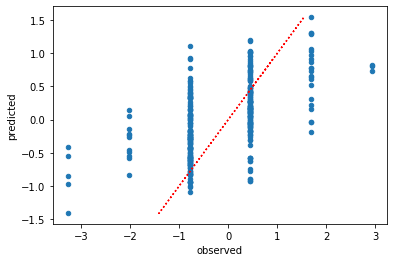

In [9]:
df2.plot.scatter('observed', 'predicted')
plot(y_pred, y_pred, 'r:')
show()

1. What is the regression equation for estimating your chosen trait values?

Regression equation:
$$
y = b_0+c_1x_1+c_2x_2+\verb!...!+c_nx_n
$$

$$
y = 0.0292+0.0492*\verb!fixed acidity!+(-0.2332)*\verb!volatile acidity!+\verb!...!+0.3740*\verb!alcohol!
$$

In [10]:
coef_df = pd.DataFrame(reg.coef_, index=X_train.columns, columns=['coef'])
coef_df

,coef
fixed acidity,0.049176
volatile acidity,-0.233206
citric acid,-0.043451
residual sugar,0.018494
chlorides,-0.102484
free sulfur dioxide,0.043003
total sulfur dioxide,-0.150172
density,-0.045388
pH,-0.065286
sulphates,0.169435


2. What are the five most useful variables for estimating the trait values?

In [15]:
# Sort coefficients in desending order and show top five.
coef_df.sort_values('coef', ascending=0).head(5)

,coef
alcohol,0.373961
sulphates,0.169435
fixed acidity,0.049176
free sulfur dioxide,0.043003
residual sugar,0.018494


3. Provide a validation-based error estimate for your model. As the data set is large, use
split validation that divides the data set into separate training and testing sets.

In [17]:
# Compute error statistics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2s = r2_score(y_test, y_pred)
print('MSE =', mse)
print('R2s =', r2s)

MSE = 0.6620874330717366
R2s = 0.2874758096280009


The $R^2$ score being closer to 0 than 1 implies variables do not explain the variation of the quality.